
# **Preliminaries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
import tensorflow as tf
from tensorflow import keras as ks
import warnings
warnings.filterwarnings('ignore')

# **Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ='/content/drive/MyDrive/Data_XY.csv'
data = pd.read_csv(path)

In [ ]:
# split into input (X) and output (Y) variables
x = data.iloc[:,:4186]
x = np.array(x)
y = data['y']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape)

(525, 4186)


# **Feedforward Neural Network**

In [ ]:
from tensorflow import keras as ks

model = ks.Sequential()
model.add(ks.layers.Dense(20, activation=ks.activations.relu, input_dim =  4186))
model.add(ks.layers.Dense(20, activation=ks.activations.relu))
model.add(ks.layers.Dense(19, activation=ks.activations.relu))
model.add(ks.layers.Dense(209, activation=ks.activations.relu))
model.add(ks.layers.Dense(211, activation=ks.activations.relu))
model.add(ks.layers.Dense(20, activation=ks.activations.relu))
model.add(ks.layers.Dense(20, activation=ks.activations.relu))
model.add(ks.layers.Dense(1, activation=ks.activations.linear))
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 20)                83740     
_________________________________________________________________
dense_128 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_129 (Dense)            (None, 19)                399       
_________________________________________________________________
dense_130 (Dense)            (None, 209)               4180      
_________________________________________________________________
dense_131 (Dense)            (None, 211)               44310     
_________________________________________________________________
dense_132 (Dense)            (None, 20)                4240      
_________________________________________________________________
dense_133 (Dense)            (None, 20)              

In [ ]:
model.compile( loss='mean_squared_error',optimizer='adam',metrics='mse')

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=30,  verbose=1, validation_split=0.2)

Epoch 1/100
14/14 [==============================] - 1s 20ms/step - loss: 12.8424 - mse: 12.8424 - val_loss: 4.5580 - val_mse: 4.5580
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 2.3190 - mse: 2.3190 - val_loss: 1.0800 - val_mse: 1.0800
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 0.9342 - mse: 0.9342 - val_loss: 0.6537 - val_mse: 0.6537
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 0.3696 - mse: 0.3696 - val_loss: 0.1537 - val_mse: 0.1537
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0922 - mse: 0.0922 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 6/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0394 - mse: 0.0394 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 8/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0100 

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


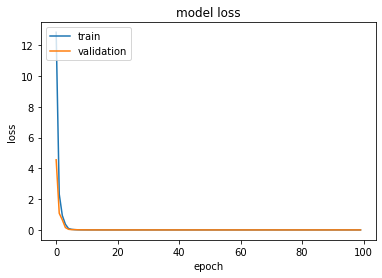

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(x_test)

Text(0.5, 0.98, 'Predictions vs Actual data (FNN Regressor , n_neighbors = 10)')

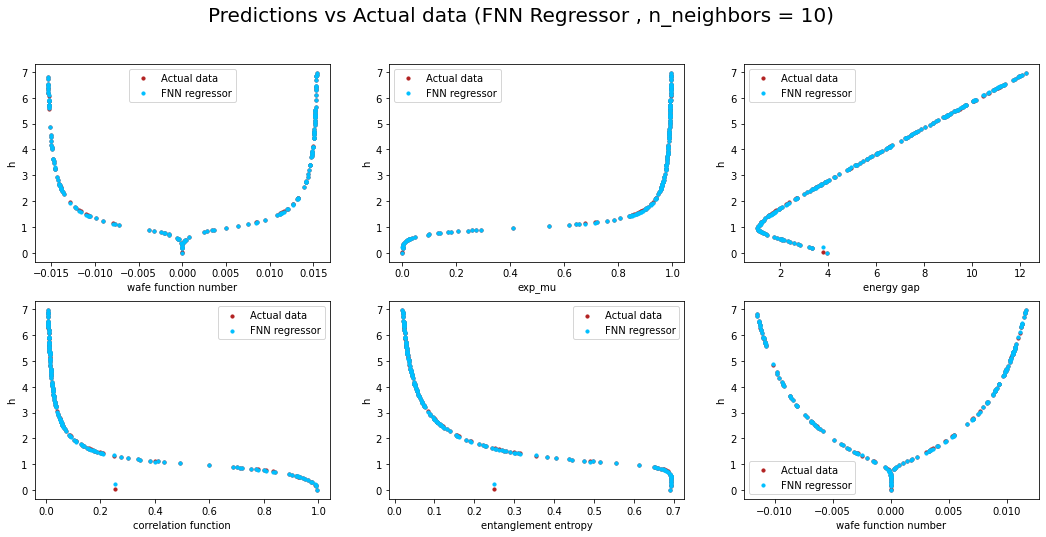

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes[0][0].scatter(x_test[:,300],y_test,s=10,label="Actual data",c='firebrick')
axes[0][0].scatter(x_test[:,300],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[0][0].legend()
axes[0][0].set_xlabel('wafe function number')
axes[0][0].set_ylabel('h')
##
axes[1][0].scatter(x_test[:,20],y_test,s=10,label="Actual data",c='firebrick')
axes[1][0].scatter(x_test[:,20],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[1][0].legend()
axes[1][0].set_xlabel('correlation function')
axes[1][0].set_ylabel('h')
##
axes[0][1].scatter(x_test[:,70],y_test,s=10,label="Actual data",c='firebrick')
axes[0][1].scatter(x_test[:,70],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[0][1].legend()
axes[0][1].set_xlabel('exp_mu')
axes[0][1].set_ylabel('h')
##
axes[1][1].scatter(x_test[:,88],y_test,s=10,label="Actual data",c='firebrick')
axes[1][1].scatter(x_test[:,88],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[1][1].legend()
axes[1][1].set_xlabel('entanglement entropy')
axes[1][1].set_ylabel('h')
##
axes[0][2].scatter(x_test[:,78],y_test,s=10,label="Actual data",c='firebrick')
axes[0][2].scatter(x_test[:,78],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[0][2].legend()
axes[0][2].set_xlabel('energy gap')
axes[0][2].set_ylabel('h')
##
axes[1][2].scatter(x_test[:,3500],y_test,s=10,label="Actual data",c='firebrick')
axes[1][2].scatter(x_test[:,3500],y_pred,s=10, label="FNN regressor", c = 'deepskyblue')
axes[1][2].legend()
axes[1][2].set_xlabel('wafe function number')
axes[1][2].set_ylabel('h')
fig.suptitle("Predictions vs Actual data (FNN Regressor , n_neighbors = 10)",fontsize = 20)

In [ ]:
def model_fnn():
  model = ks.Sequential()
  model.add(ks.layers.Dense(10, activation=ks.activations.relu, input_dim =  4186))
  model.add(ks.layers.Dense(20, activation=ks.activations.relu))
  model.add(ks.layers.Dense(20, activation=ks.activations.relu))
  model.add(ks.layers.Dense(200, activation=ks.activations.relu))
  model.add(ks.layers.Dense(200, activation=ks.activations.relu))
  model.add(ks.layers.Dense(20, activation=ks.activations.relu))
  model.add(ks.layers.Dense(20, activation=ks.activations.relu))
  model.add(ks.layers.Dense(1, activation=ks.activations.relu)) 
  return model

In [ ]:
def model_fnn(dense_layer_sizes, lr):
    model = keras.Sequential() 
    for i in range(len(dense_layer_sizes )):
        model.add(keras.layers.Dense(dense_layer_sizes[i], 
                                      activation=tf.nn.relu #, 
                                      #kernel_regularizer = keras.regularizers.l2(regularizations[i]) 
                                     ) )
        #model.add(keras.layers.Dropout( dropouts[i] ) )
    model.add(keras.layers.Dense(1, activation=ks.activations.linear))
        
    model.compile(loss='mean_squared_error', 
                  optimizer=keras.optimizers.Adam(learning_rate=lr), 
                  metrics=['mean_squared_error'])
    return model

In [ ]:
def model_fn(dense_layer_sizes, lr=.1):
    model = ks.Sequential() 
    for i in range( len(dense_layer_sizes )):
        model.add( ks.layers.Dense( dense_layer_sizes[i], 
                                      activation=tf.nn.relu #, 
                                      # kernel_regularizer=keras.regularizers.l2(regularizations[i]) 
                                     ) )
        # model.add(keras.layers.Dropout( dropouts[i] ) )
        
       
    model.add(ks.layers.Dense(1, activation=ks.activations.linear))
        
    model.compile(loss='mean_squared_error', 
                  optimizer=ks.optimizers.Adam(learning_rate=lr), 
                  metrics=['mean_squared_error'])
    return model

In [ ]:
mdl = model_fn([100, 30], .1)

In [ ]:
#bug
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
FNN_Regressor = KerasRegressor(model_fn, batch_size = 50, epochs=150)
regularizations_candidates = [(.01),(.001) ]
dropouts_candidates = [(.005), (.01), (.003)]
dense_size_candidates = [(10, 40), (50) , (20) ,(100),(200)]
lr_candidates = [0.01, 0.1]
epch_candidates = [150]
batch_size_candidates = [20, 30, 50]
optimizer_candidates = ['adam','rmsprop']
validator = GridSearchCV(FNN_Regressor,
                         param_grid={'dense_layer_sizes': dense_size_candidates,
                                     # epochs is avail for tuning even when not
                                     # an argument to model building function
                                     'epochs': epch_candidates ,
                                     'batch_size':batch_size_candidates,
                                     #'regularizations': regularizations_candidates,
                                     #'dropouts': dropouts_candidates,
                                     'lr': lr_candidates},
                                     #'optimizer': optimizer_candidates},
                          scoring= 'neg_mean_squared_error',
                         n_jobs= 1,  )
history = validator.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
Epoch 52/150
14/14 [==============================] - 0s 5ms/step - loss: 9.0966e-04 - mean_squared_error: 9.0966e-04
Epoch 53/150
14/14 [==============================] - 0s 6ms/step - loss: 9.4414e-04 - mean_squared_error: 9.4414e-04
Epoch 54/150
14/14 [==============================] - 0s 5ms/step - loss: 9.5691e-04 - mean_squared_error: 9.5691e-04
Epoch 55/150
14/14 [==============================] - 0s 5ms/step - loss: 6.4519e-04 - mean_squared_error: 6.4519e-04
Epoch 56/150
14/14 [==============================] - 0s 6ms/step - loss: 5.4914e-04 - mean_squared_error: 5.4914e-04
Epoch 57/150
14/14 [==============================] - 0s 5ms/step - loss: 5.6948e-04 - mean_squared_error: 5.6948e-04
Epoch 58/150
14/14 [==============================] - 0s 7ms/step - loss: 6.7071e-04 - mean_squared_error: 6.7071e-04
Epoch 59/150
14/14 [==============================] - 0s 6ms/step - loss: 6.0073e-04 - mean_squared_error: 6.0073e-04
Epoch

GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f8534ac5a90>,
             iid='deprecated', n_jobs=1,
             param_grid={'batch_size': [20, 30, 50],
                         'dense_layer_sizes': [(10, 40), 50, 20, 100, 200],
                         'epochs': [150], 'lr': [0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

{'batch_size': 30, 'dense_layer_sizes': (10, 40), 'epochs': 150, 'lr': 0.01}

In [ ]:
mdl = model_fn([10, 40], .01)

In [ ]:
history = model.fit(x_train, y_train, epochs=150, batch_size=30,  verbose=1, validation_split=0.2)

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 71kB 4.3MB/s 


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def model_fnn(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=20,
                                            max_value=210,
                                            step=10),
                               activation=hp.Choice('act_'+ str(i), ['relu','softmax','tanh'])))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',values = [0.1,0.001,0.0001])),
        loss='mean_squared_error',
        metrics=['mean_squared_error'])
    return model

In [ ]:
tuner = RandomSearch(
    model_fnn,
    objective='val_mean_squared_error',
    max_trials=5,
    executions_per_trial=3,
    directory='new_project6')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 210, 'step': 10, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 210, 'step': 10, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'softmax', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(x_train, y_train,
             epochs=150,
             batch_size = 30,
             validation_data=(x_test, y_test))

Trial 5 Complete [00h 01m 40s]
val_mean_squared_error: 0.001174903552358349

Best val_mean_squared_error So Far: 0.0005474372592289001
Total elapsed time: 00h 07m 21s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in new_project3/untitled_project
Showing 10 best trials
Objective(name='val_mean_squared_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 3
units_0: 80
act_0: softmax
units_1: 180
act_1: softmax
learning_rate: 0.001
units_2: 120
act_2: relu
units_3: 200
act_3: relu
units_4: 60
act_4: softmax
units_5: 180
act_5: relu
units_6: 40
act_6: softmax
units_7: 80
act_7: tanh
Score: 0.008160271837065617
Trial summary
Hyperparameters:
num_layers: 8
units_0: 60
act_0: tanh
units_1: 60
act_1: softmax
learning_rate: 0.1
units_2: 20
act_2: relu
units_3: 20
act_3: relu
units_4: 20
act_4: relu
units_5: 20
act_5: relu
units_6: 20
act_6: relu
units_7: 20
act_7: relu
Score: 3.4358574549357095
Trial summary
Hyperparameters:
num_layers: 7
units_0: 160
act_0: tanh
units_1: 20
act_1: tanh
learning_rate: 0.1
units_2: 60
act_2: relu
units_3: 40
act_3: relu
units_4: 120
act_4: tanh
units_5: 140
act_5: relu
units_6: 200
act_6: relu
units_7: 40
act_7: tanh
Score: 4.049745

In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
history = best_model.fit(x_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150
9/9 [==============================] - 1s 25ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 2/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 3/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 4/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 5/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 6/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 7/150
9/9 [============================

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


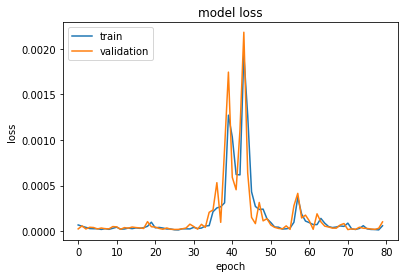

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()